# Computing derivative and updating parameter

In [75]:
import sympy as sy
import math
import numpy as np
from IPython.display import Image

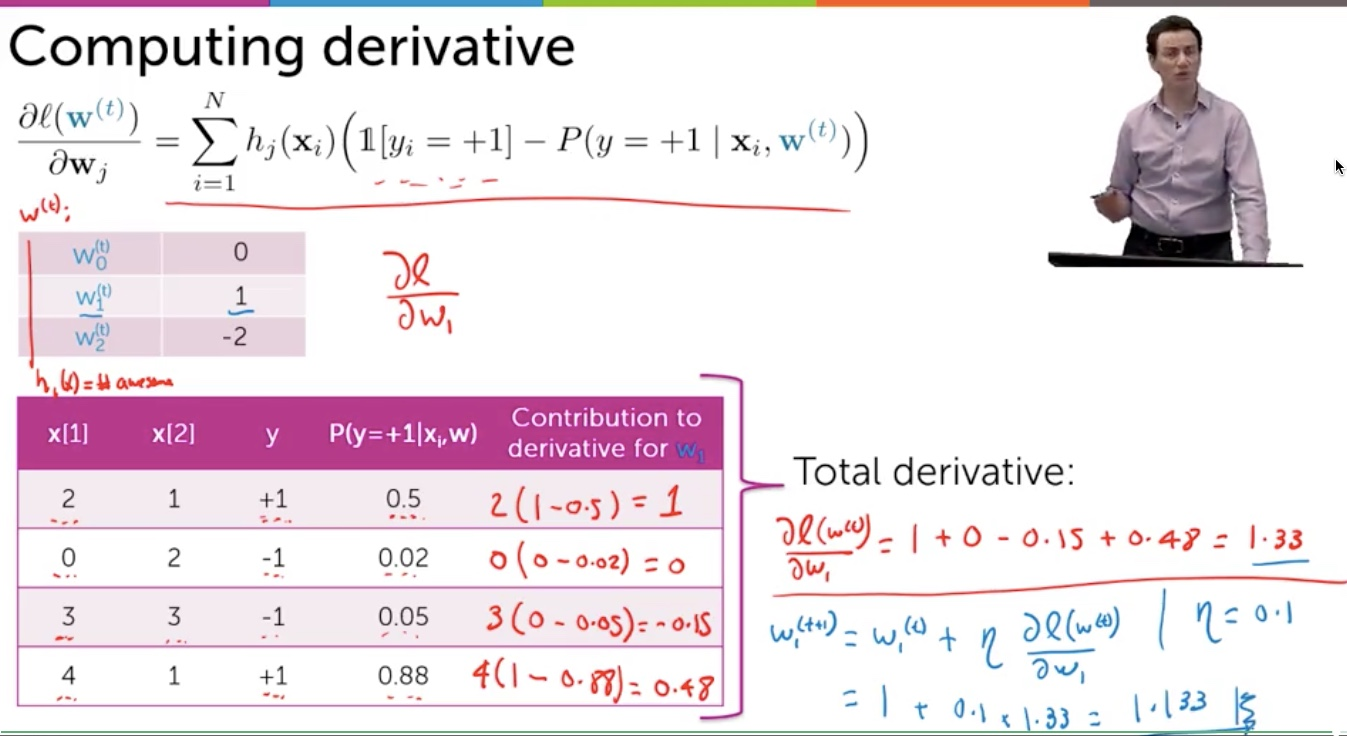

In [77]:
Image(filename='ExampleDerivativeLikelyhood.jpg')

In [78]:
awesomes = [2,0,3,4]
awfuls = [1,2,3,1]
y = [1,-1,-1,1]

Let's assume the coefficients at iteration t are:

In [79]:
coefficients_t = [0,1,2]

## 1. Using for loops

<font color='red'>Not efficient!</font>

### 1.1 Predict

Estimating conditional probability with link function.
$$
P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))}
$$

In [80]:
score = sy.Symbol('score')
sigmoid_function = 1 / (1 + math.e ** (-1*score))

In [81]:
def get_probability(one_score):
    '''
    This functions take in a single score - which could be any real number - 
    and squeezes it into the 0-1 range, respresenting the min and max of a prob
    '''
    s = one_score
    prob = round(sigmoid_function.subs({score:s}),4)
    return prob

In [82]:
def logistic_regression(awesomes,awfuls,coefficients):
    '''
    This function takes a list of # of awesomes and a list of corresponding # of awfuls and w0,w1 and w2 coefficients
    and returns both the scores (result of linear function) as well as the probabilities (result sinoid).
    '''
    scores = []
    probabilities = []
    for i in range(len(awesomes)):
        awesome = awesomes[i]
        awful = awfuls[i]
        one_score = coefficients[0] +  coefficients[1] * awesome - coefficients[2] * awful
        scores.append(one_score)
        one_prob = get_probability(one_score)
        probabilities.append(one_prob)
    return scores,probabilities

In [83]:
predictions_loop_t = logistic_regression(awesomes,awfuls,coefficients_t)

In [84]:
scores_loop_t = predictions_loop_t[0]
scores_loop_t

[0, -4, -3, 2]

In [85]:
probabilities_loop_t = predictions_loop_t[1]
predictions_loop_t = probabilities_loop_t
predictions_loop_t

[0.5, 0.018, 0.0474, 0.8808]

### 1.2 Measure quality

With data likelihood function.
$$
\ell(w) = \prod_{i=1}^N P(yi|xi,w)
$$
Note that this is the product of the probability of each $y_i$ given $x_i$ and w $P(yi|xi,w)$ and not the probability that $y_i$ is +1 given $x_i$ and w $ P(yi=+1|xi,w) $.

In [86]:
def data_likelihood(truths,probabilities):
    '''
    Calculates the data likelyhood which is the product of all the probabilities 
    for positive sentiment reviews and 
    the complement of the probabilities for negative reviews.
    '''
    l = 1
    for i in range(len(truths)):
        z = y[i]
        if z == 1:
            l *= probabilities[i]
        else:
            complement = 1 - probabilities[i]
            l *= complement
    return l

In [87]:
data_likelihood_loop = data_likelihood(y,predictions_loop_t)

In [88]:
data_likelihood_loop

0.41197358928

### 1.3 Take derivative

$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$$

### 1.3.1 Contributions to partial derivative of ${\ell}$ computed at $w^{(t)}$ with respect to $w_1$

In [89]:
def indictor_function(truth):
    '''
    The indicator function returns 1 if the truth is 1
    and 0 if the truth is -1
    '''
    if truth == 1:
        return 1
    else:
        return 0

In [90]:
def partial_derivative(truths,predictions,feature):
    contributions = []
    for i in range(len(truths)):
        contribution = feature[i]*(indictor_function(truths[i])-predictions[i])
        contributions.append(contribution)
    return contributions

In [91]:
# Contributions to derivative for w1
contributions_loop_t = partial_derivative(y,predictions_loop_t,awesomes)
contributions_loop_t

[1.0, -0.0, -0.1422, 0.4767999999999999]

### 1.3.2 Partial derivative of ${\ell}$ computed at $w^{(t)}$ with respect to $w_1$

In [92]:
derivative_loop_t_w1 = np.sum(contributions_loop_t)
derivative_loop_t_w1

1.3346

## 2. Using vectors

<font color='green'>Much more efficient using vectors!!</font>

In [93]:
awesomes = [2,0,3,4]
awfuls = [1,2,3,1]
y = [1,-1,-1,1]

In [94]:
coefficients_t = np.array([0.,1.,-2.])
x = np.array([[1,1,1,1],awesomes,awfuls]).T
y = np.array([y]).T

In [95]:
coefficients_t

array([ 0.,  1., -2.])

In [96]:
x.T

array([[1, 1, 1, 1],
       [2, 0, 3, 4],
       [1, 2, 3, 1]])

### 2.1 Predict

$$
[score]=[coefficients]^T[feature] = [coefficients][feature]^T = 
\left[
\begin{array}{cccc}
(\mathbf{w}_0) & (\mathbf{w}_1) & \cdots & (\mathbf{w}_D) \\
\end{array}
\right]
\left[
\begin{array}{cccc}
h_0(\mathbf{x}_1) & h_1(\mathbf{x}_1) & \cdots & h_D(\mathbf{x}_1) \\
h_0(\mathbf{x}_2) & h_1(\mathbf{x}_2) & \cdots & h_D(\mathbf{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
h_0(\mathbf{x}_N) & h_1(\mathbf{x}_N) & \cdots & h_D(\mathbf{x}_N)
\end{array}
\right]^T
$$

In [97]:
scores_vector_t = np.dot(coefficients_t,x.T)
scores_vector_t

array([ 0., -4., -3.,  2.])

In [98]:
predictions_vector_t = 1./(1+np.exp(-scores_vector_t))

In [99]:
predictions_vector_t

array([ 0.5       ,  0.01798621,  0.04742587,  0.88079708])

### 2.2 Measure quality

In [100]:
y.T*predictions_vector_t

array([[ 0.5       , -0.01798621, -0.04742587,  0.88079708]])

In [101]:
z = np.copy(y)
z[z==1]=0
z[z==-1]=1

In [102]:
z

array([[0],
       [1],
       [1],
       [0]])

In [103]:
z.T + (y.T*predictions_vector_t)

array([[ 0.5       ,  0.98201379,  0.95257413,  0.88079708]])

In [104]:
data_likelihood_vector = np.prod(z.T + (y.T*predictions_vector_t))

In [105]:
data_likelihood_vector

0.41196681825398518

### 2.3 Take derivative

### 2.3.1 Contributions to partial derivative of ${\ell}$ computed at $w^{(t)}$ with respect to $w_1$

In [106]:
truths = y
truths[truths==-1]=0

In [107]:
y

array([[1],
       [0],
       [0],
       [1]])

In [108]:
x[:,1]

array([2, 0, 3, 4])

In [109]:
contributions_vector_t = x[:,1] * (truths.T - predictions_vector_t)

In [110]:
contributions_vector_t 

array([[ 1.        , -0.        , -0.14227762,  0.47681169]])

### 2.3.2 Partial derivative of ${\ell}$ computed at $w^{(t)}$ with respect to $w_1$

In [111]:
derivative_vector_t_w1 = np.sum(contributions_vector_t )
derivative_vector_t_w1

1.3345340685557705

## 3. Comparison loop and vector solutions

In [117]:
round(data_likelihood_loop,2) == round(data_likelihood_vector,2)

True

In [116]:
round(derivative_loop_t_w1,2) == round(derivative_vector_t_w1,2)

True

## 4. Update $w_1$

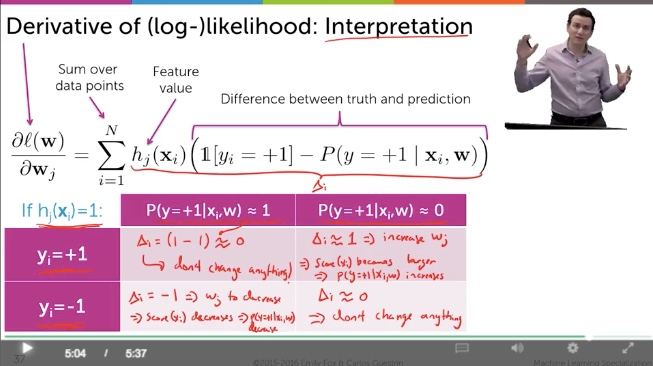

In [37]:
Image(filename='ExampleDerivativeLikelyhoodInterpretation.jpg')

In [38]:
etha = 0.1

In [39]:
coefficients_t[1] =coefficients_t[1] + etha * derivative_vector_t_w1

In [40]:
coefficients_t[1]

1.1334599999999999

In [41]:
coefficients_t

array([ 0.     ,  1.13346, -2.     ])